# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the prectice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & Steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑**Note:** We start with a smallet dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scalling up.

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-02 13:48:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  52.1MB/s    in 2.0s    

2023-12-02 13:48:25 (52.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  1 16:54 .
drwxr-xr-x 1 root root 4096 Dec  1 16:54 ..
drwxr-xr-x 4 root root 4096 Dec  1 16:54 test
drwxr-xr-x 4 root root 4096 Dec  1 16:54 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To Visualize our images, first get the class names programmatically.

In [ ]:
import tensorflow as tf
import os

In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")

for item in data_dir.glob("*"):
  print(item)

pizza_steak/train/pizza
pizza_steak/train/steak


In [ ]:
# get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  #Created a list of class_name from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  # Get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape: {img.shape}")

  return img

['1403878.jpg']
Image Shape: (512, 512, 3)


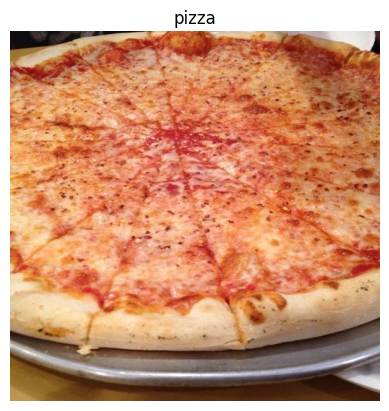

In [ ]:
# View random image from the training data
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img

array([[[16,  6,  5],
        [15,  5,  4],
        [14,  4,  3],
        ...,
        [22, 16, 20],
        [23, 17, 21],
        [23, 17, 21]],

       [[17,  7,  6],
        [16,  6,  5],
        [15,  5,  4],
        ...,
        [22, 16, 20],
        [21, 15, 19],
        [20, 14, 18]],

       [[15,  5,  4],
        [14,  4,  3],
        [14,  4,  3],
        ...,
        [28, 19, 24],
        [23, 17, 19],
        [21, 15, 17]],

       ...,

       [[16, 11,  8],
        [15, 10,  7],
        [15,  7,  5],
        ...,
        [86, 40, 17],
        [81, 34, 14],
        [79, 32, 12]],

       [[15, 10,  7],
        [14,  9,  6],
        [15,  7,  5],
        ...,
        [76, 33, 14],
        [77, 32, 13],
        [77, 32, 13]],

       [[14,  9,  6],
        [13,  8,  5],
        [14,  6,  4],
        ...,
        [71, 30, 10],
        [78, 35, 18],
        [83, 40, 23]]], dtype=uint8)

In [ ]:
img_array = tf.constant(img)
tf.reduce_max(img_array), tf.reduce_min(img_array)

(<tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

🔑**NOTE:** As we've discussed before, many machine learning models, including nerul networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normaliza**) their poxel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.0627451 , 0.02352941, 0.01960784],
        [0.05882353, 0.01960784, 0.01568627],
        [0.05490196, 0.01568627, 0.01176471],
        ...,
        [0.08627451, 0.0627451 , 0.07843137],
        [0.09019608, 0.06666667, 0.08235294],
        [0.09019608, 0.06666667, 0.08235294]],

       [[0.06666667, 0.02745098, 0.02352941],
        [0.0627451 , 0.02352941, 0.01960784],
        [0.05882353, 0.01960784, 0.01568627],
        ...,
        [0.08627451, 0.0627451 , 0.07843137],
        [0.08235294, 0.05882353, 0.0745098 ],
        [0.07843137, 0.05490196, 0.07058824]],

       [[0.05882353, 0.01960784, 0.01568627],
        [0.05490196, 0.01568627, 0.01176471],
        [0.05490196, 0.01568627, 0.01176471],
        ...,
        [0.10980392, 0.0745098 , 0.09411765],
        [0.09019608, 0.06666667, 0.0745098 ],
        [0.08235294, 0.05882353, 0.06666667]],

       ...,

       [[0.0627451 , 0.04313725, 0.03137255],
        [0.05882353, 0.03921569, 0.02745098],
        [0.05882353, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our image
* Preprocess our image
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 &1 , also called scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model ( same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D( filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 127s 3s/step - loss: 0.7043 - accuracy: 0.4927 - val_loss: 0.6680 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 116s 2s/step - loss: 0.5829 - accuracy: 0.6727 - val_loss: 0.4758 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 117s 2s/step - loss: 0.4859 - accuracy: 0.7780 - val_loss: 0.3822 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 106s 2s/step - loss: 0.4185 - accuracy: 0.8227 - val_loss: 0.3520 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 106s 2s/step - loss: 0.3662 - accuracy: 0.8487 - val_loss: 0.3618 - val_accuracy: 0.8340


In [ ]:
len(train_data)

47

In [ ]:
1500/32

46.875

## An end-to-end example Run in GPU

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data ( get all of the pixel values between 0 &1 , also called scaling/Normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)

# Build a CNN model ( same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 107s 2s/step - loss: 0.5847 - accuracy: 0.6847 - val_loss: 0.5403 - val_accuracy: 0.6940
Epoch 2/5
47/47 [==============================] - 115s 2s/step - loss: 0.4483 - accuracy: 0.7953 - val_loss: 0.3929 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 115s 2s/step - loss: 0.4013 - accuracy: 0.8200 - val_loss: 0.3285 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 116s 2s/step - loss: 0.3570 - accuracy: 0.8447 - val_loss: 0.3293 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - ETA: 0s - loss: 0.3310 - accuracy: 0.8640

KeyboardInterrupt: ignored

> 🔑**Note:** If the above cell is taking longer than ~10 seconds per epochs, make sure you're using a GPU by going to Runtime -> Change Runtime Types -> Hardware Accelator -> GPU (you may have to rerun some cells above).

In [ ]:
# Get the model summary
model_1.summary()

⚒ **Practice & Exercise:** Go to CNN Explainer website for min 10 mins and compare our neural nerwork with theirs: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we're built in a previous section to see if it works with our data.

The model we're building is from the TensorFlow playground:

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
# 1. Create the model (same as model 7)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(7, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

In [ ]:
# Get the summary of model_2
model_2.summary()

Despite having 20x more parameters than our CNN(model_1), Model_2 performs terribly... let's to improve it

In [ ]:
# Sst random set seed
tf.random.set_seed(42)

# Creaate model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

In [ ]:
# Get a summary of model_3
model_3.summary()

In [ ]:
15073201/31101 #

> 🔑 **Note** You can think of trainable parameters as **patterns a model can learn from data.** Intutively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're  using. Where a sereies of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort our and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural networj, these are often more helpful in dechiphering between diferrent **features** in an image.

In [ ]:
model_1.summary()

## Binary Classification: Let's Break it Down...

1. Become one with the data ( Visualize, Visualize, Visualize)
2. Preprocess the data (prepared it for model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model(start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model(try to beat our baseline)
7. repeat until satisfied(experiment, experiment, experiment)

### 1. Become one with data

['2878151.jpg']
Image Shape: (512, 512, 3)
['262133.jpg']
Image Shape: (384, 512, 3)


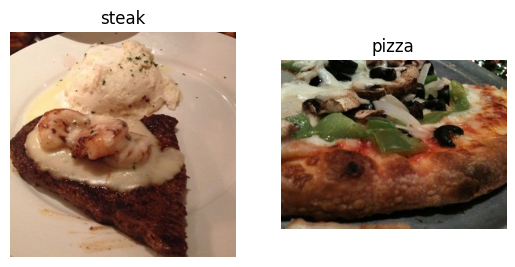

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for model)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:

  1. 10,000 images (or more) might not fit into the memory of your processor(GPU)
  2. Trying to learn the patterns in 10,000 images in one hit. Could result in the model not being able to learn very well.

  Why 32?
  Because 32 is good for health... Advise from *Yann LeCun* Twitter

In [ ]:
!nvidia-smi

Fri Dec  1 13:10:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Create train and test data generators and rescale the data
train_data = image_dataset_from_directory(train_dir, # Target directory image
                                          image_size=(img_height, img_width), # Target size of the Images
                                          label_mode="binary", # Type of data you're working with
                                          batch_size=batch_size) # Size of the minibatches to load data into

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(img_height, img_width),
                                         label_mode="binary",
                                         batch_size=batch_size)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get a sample of training data batch
#images, labels = train_data.next() # Get the "next" batch of images/lables in train_data
for images, labels in train_data:
  print(len(images), len(labels))


32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
32 32
28 28


In [ ]:
# get the first two images
images[:2], images[0].shape

(<tf.Tensor: shape=(2, 224, 224, 3), dtype=float32, numpy=
 array([[[[174.15306 , 157.15306 , 139.86736 ],
          [126.44898 , 104.658165,  83.80612 ],
          [130.71428 ,  99.85714 ,  75.64286 ],
          ...,
          [189.06636 , 170.06636 , 153.06636 ],
          [184.47446 , 167.47446 , 149.47446 ],
          [182.35721 , 167.35721 , 148.35721 ]],
 
         [[188.32143 , 172.03572 , 152.4847  ],
          [132.96428 , 111.24999 ,  88.331635],
          [141.46938 , 113.22959 ,  86.82653 ],
          ...,
          [188.      , 169.      , 152.      ],
          [187.06125 , 170.06125 , 152.06125 ],
          [187.12239 , 172.12239 , 153.12239 ]],
 
         [[200.68878 , 185.91837 , 163.40306 ],
          [148.2602  , 129.14285 , 103.94387 ],
          [142.35713 , 115.5     ,  88.71429 ],
          ...,
          [191.59692 , 172.59692 , 155.59692 ],
          [185.05617 , 168.05617 , 150.05617 ],
          [187.79073 , 172.79073 , 153.79073 ]],
 
         ...,
 
       

In [ ]:
images[8].shape

TensorShape([224, 224, 3])

In [ ]:
# View the first batch of labels
labels # Here in 2d but in video it in 1d array

<tf.Tensor: shape=(28, 1), dtype=float32, numpy=
array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

### 3. Create a CNN Model (Start with a baseline)

A baseline is a relatively simple model or exisiting result that you setup with begining experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem.)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling
from tensorflow.keras import Sequential

In [ ]:

# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Rescaling(scale=1./255),
    Conv2D(filters=10, # FILTER IS THE NUMBER OF sliding windows going across an input (higher = more complex)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same as input shape, if "valid", outpit shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3),), # Input layer (Specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # Output layer (working with binary classification so only 1 Output neuron)
])

**Practice:** Understand what's going on in a Conv2d by going through the CNN explainer website

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer = Adam(),
                metrics=['accuracy'])

In [ ]:
# Get the summary of our model
model_4.summary()

ValueError: ignored

### 4. Fit the Model

In [ ]:
# Check the lenghts of training and test data generater
len(train_data), len(test_data)



(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        ) #callbacks=[tensorboard_callback]

Epoch 1/5
47/47 [==============================] - 17s 100ms/step - loss: 1.4230 - accuracy: 0.6627 - val_loss: 0.4660 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 4s 80ms/step - loss: 0.4766 - accuracy: 0.7827 - val_loss: 0.3990 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 4s 78ms/step - loss: 0.4124 - accuracy: 0.8273 - val_loss: 0.3762 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 5s 97ms/step - loss: 0.3318 - accuracy: 0.8680 - val_loss: 0.3759 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 5s 105ms/step - loss: 0.2500 - accuracy: 0.9113 - val_loss: 0.3822 - val_accuracy: 0.8380


### 5. Evaluating our model

It look like our model is learning something, let's evaluate it

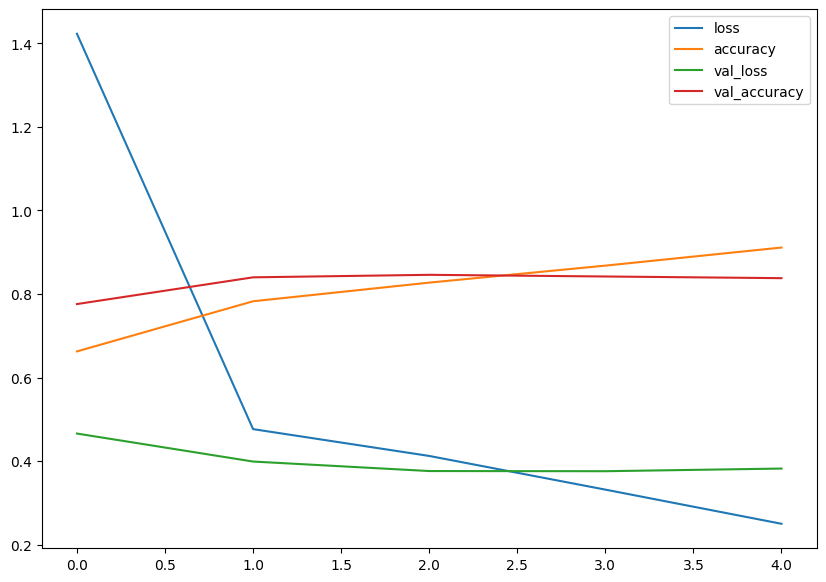

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# PLot the validation and training curves seperately

import matplotlib.pyplot as plt

def plot_loss_curve(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # How many epochs

  # Plot the loss
  plt.plot(epochs, loss, label = "Traing Loss")
  plt.plot(epochs, val_loss, label = "Validation loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend();

  # Plot therr accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "Traing accuracy")
  plt.plot(epochs, val_accuracy, label = "Validation accuracy")
  plt.title("accuracy")
  plt.xlabel("Epochs")
  plt.legend();

> **NOTE:** When a model's **Validation loss starts to increase**, it's likely that the model is **Overfitting** the training dataset. Tnis means, it's learning the patterns in the training dataset *tto well* and thus the model's ability to generalize to unseen data will be diminished.

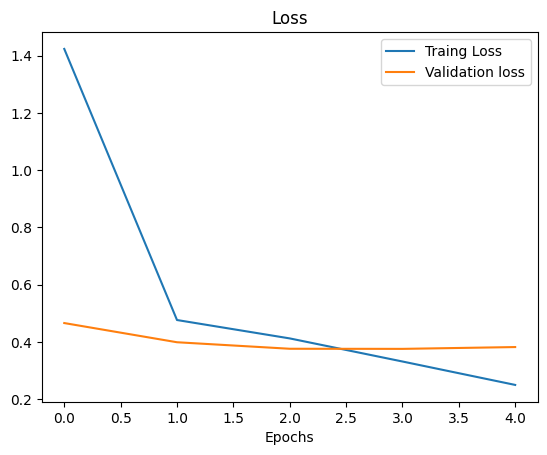

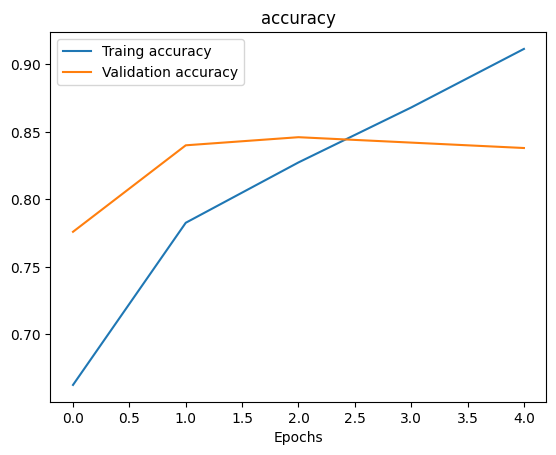

In [ ]:
# Check out th eloss and accuracy of model_4
plot_loss_curve(history_4)

### 6. Adjust the model paramters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting'

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of out flattened layers

Reduce:
* Add data augmentation
* Add regularization layers (Such a MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **regularization**

In [ ]:
# Create the model (this is going to be our new model)

model_5 = Sequential([
    Rescaling(scale=1./255),
    Conv2D(10,3, activation='relu', input_shape = (224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit he Model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 86ms/step - loss: 0.6147 - accuracy: 0.6527 - val_loss: 0.5424 - val_accuracy: 0.6920
Epoch 2/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4867 - accuracy: 0.7613 - val_loss: 0.3901 - val_accuracy: 0.8360
Epoch 3/5
47/47 [==============================] - 4s 88ms/step - loss: 0.4256 - accuracy: 0.8060 - val_loss: 0.3396 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 7s 124ms/step - loss: 0.3956 - accuracy: 0.8300 - val_loss: 0.3213 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 7s 137ms/step - loss: 0.3836 - accuracy: 0.8447 - val_loss: 0.3617 - val_accuracy: 0.8440


In [ ]:
# Get a summary of our model with maxpooling
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)       

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 

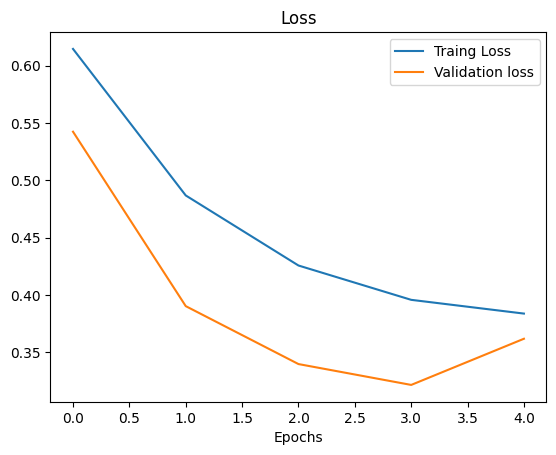

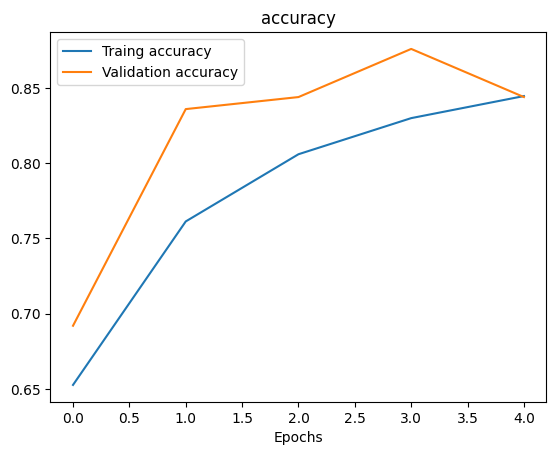

In [ ]:
# Plot loss curves
plot_loss_curve(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation


> **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Below Data Augmentation were followed by TensorFlow Documentation, (since the ImageGenerator in the video is Depracted)

> Let's write some code to visualize the data augmentation.

In [ ]:
from tensorflow.keras import layers

In [ ]:
# preprocessing layers for data augmentation
data_agumentaion = tf.keras.Sequential([
  layers.Resizing(224, 224),
  layers.Rescaling(1./255),
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomWidth(0.2),
  layers.RandomHeight(0.3)
])

> **Note:** Data augmentation is usally only performed on the training data. Using Build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finaly.. let's visualize some augmented data

In [ ]:
# Import data and augment it from training directory
# Create train and test data generators and rescale the data

augmented_train_data = image_dataset_from_directory(train_dir,
                                         image_size=(img_height, img_width),
                                         label_mode="binary",
                                         batch_size=batch_size)

train_data = image_dataset_from_directory(train_dir, # Target directory image
                                          image_size=(img_height, img_width), # Target size of the Images
                                          label_mode="binary", # Type of data you're working with
                                          batch_size=batch_size) # Size of the minibatches to load data into

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(img_height, img_width),
                                         label_mode="binary",
                                         batch_size=batch_size)

Found 1500 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
train_data

NameError: ignored

In [ ]:
import PIL

In [ ]:
train_dir

'pizza_steak/train/'

In [ ]:
# Create the model with data augmentation layer
model_6 = Sequential([
    Rescaling(1./255),
    layers.Resizing(224, 224),
    layers.RandomBrightness(factor=0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.8086 - accuracy: 0.5160 - val_loss: 0.6896 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 62s 1s/step - loss: 0.6942 - accuracy: 0.4933 - val_loss: 0.6916 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 63s 1s/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6899 - val_accuracy: 0.4940
Epoch 4/5
47/47 [==============================] - 64s 1s/step - loss: 0.6943 - accuracy: 0.4813 - val_loss: 0.6968 - val_accuracy: 0.4940
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6977 - val_accuracy: 0.5000


In [ ]:
model_6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 random_brightness (RandomB  (None, 224, 224, 3)       0         
 rightness)                                                      
                                                                 
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_2 (RandomR  (None, 224, 224, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 224, 224, 3)      

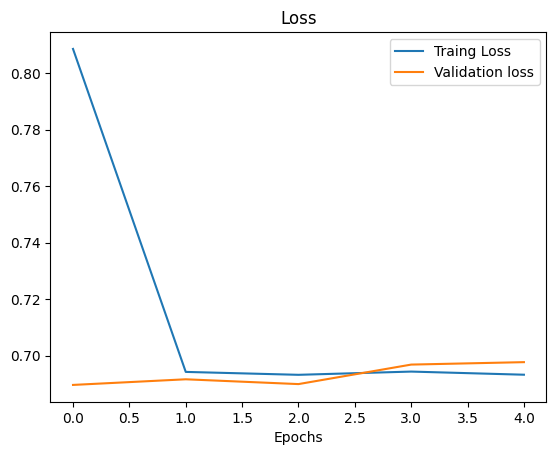

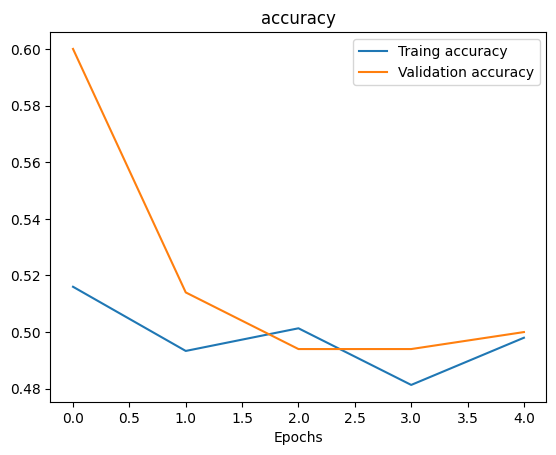

In [ ]:
# Check our models training curves
plot_loss_curve(history_6)

Let's shuffle our augmented training data and train another model ( the same as before) on it and see what happens.

In [ ]:
train_dir

'pizza_steak/train/'

In [ ]:
train_data =

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
# Import data and augment it and shuffle from training directrory
train_data_shuffled = image_dataset_from_directory(train_dir, # Target directory image
                                          image_size=(img_height, img_width),
                                          label_mode="binary",
                                          batch_size=batch_size,
                                          shuffle=True) #Shuffled data this time

test_data = image_dataset_from_directory(test_dir,
                                         image_size=(img_height, img_width),
                                         label_mode="binary",
                                         batch_size=batch_size)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Create augmented layers for data augmentation
data_augmentation_layers = Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(224, 224),
    layers.RandomBrightness(factor=0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

In [ ]:
# create the model (same a model_5 and model_6)
model_7 = Sequential([
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.Rescaling(1./255),
    layers.Resizing(224, 224),
    layers.RandomBrightness(factor=0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.Conv2D(10, 3, activation='relu', input_shape=(224,224),),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 120ms/step - loss: 0.9888 - accuracy: 0.4787 - val_loss: 0.6935 - val_accuracy: 0.4620
Epoch 2/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.4860
Epoch 4/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.4827 - val_loss: 0.6932 - val_accuracy: 0.4980
Epoch 5/5
47/47 [==============================] - 5s 88ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6933 - val_accuracy: 0.5040


In [ ]:
model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_width (RandomWidth)  (None, 224, None, 3)      0         
                                                                 
 random_height (RandomHeigh  (None, None, None, 3)     0         
 t)                                                              
                                                                 
 rescaling_2 (Rescaling)     (None, None, None, 3)     0         
                                                                 
 resizing_2 (Resizing)       (None, 224, 224, 3)       0         
                                                                 
 random_brightness_2 (Rando  (None, 224, 224, 3)       0         
 mBrightness)                                                    
                                                                 
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)      

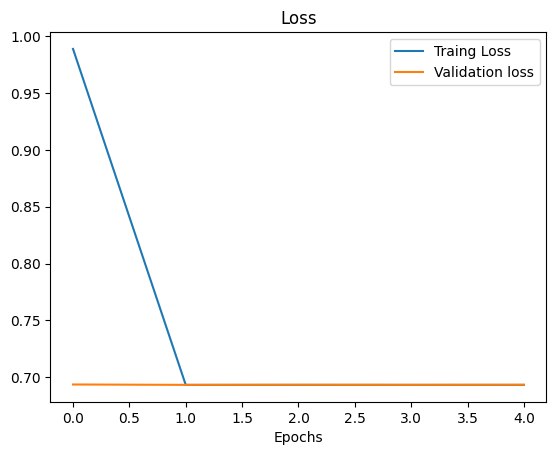

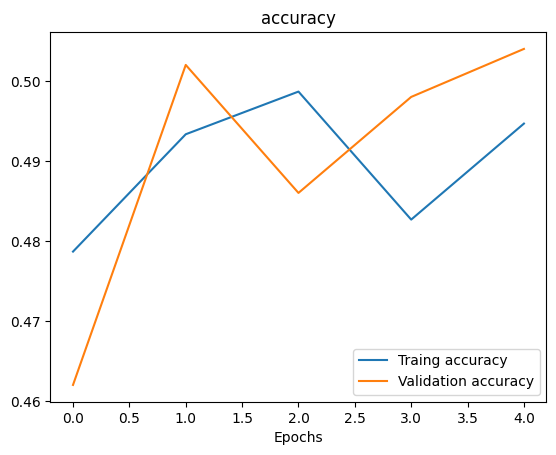

In [ ]:
plot_loss_curve(history_7)

In [ ]:
# create the model (same a model_5 and model_6) with less data augmented layers
model_8 = Sequential([
    layers.Rescaling(1./255),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.Resizing(224, 224),
    layers.Conv2D(10, 3, activation='relu', input_shape=(224,224),),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 101ms/step - loss: 0.6330 - accuracy: 0.6247 - val_loss: 0.5517 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 7s 136ms/step - loss: 0.5394 - accuracy: 0.7367 - val_loss: 0.5079 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 5s 98ms/step - loss: 0.5112 - accuracy: 0.7607 - val_loss: 0.4241 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 8s 153ms/step - loss: 0.4811 - accuracy: 0.7780 - val_loss: 0.4008 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 4s 78ms/step - loss: 0.4458 - accuracy: 0.7907 - val_loss: 0.3568 - val_accuracy: 0.8400


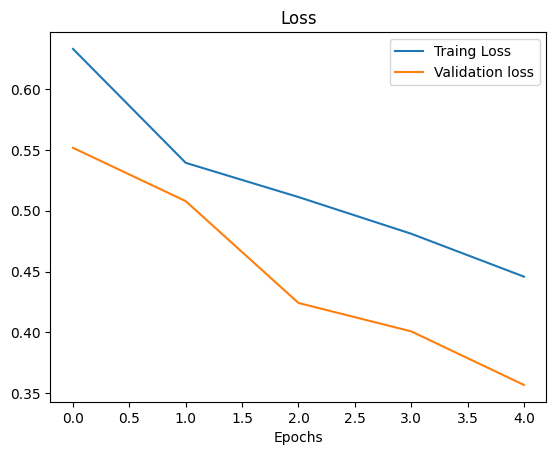

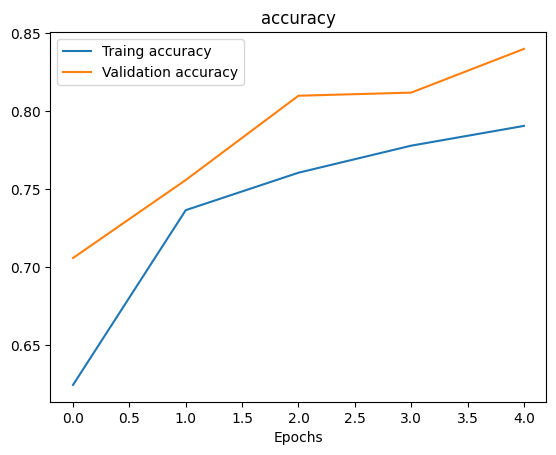

In [ ]:
plot_loss_curve(history_8)

In [ ]:
# create the model (same a model_5 and model_6) with only shuffled data and scaled layer
model_9 = Sequential([
    layers.Rescaling(1./255),
    layers.Resizing(224, 224),
    layers.Conv2D(10, 3, activation='relu', input_shape=(224,224),),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(10, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 6s 81ms/step - loss: 0.6013 - accuracy: 0.6900 - val_loss: 0.5065 - val_accuracy: 0.7440
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 0.4862 - accuracy: 0.7800 - val_loss: 0.4153 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 4s 76ms/step - loss: 0.4257 - accuracy: 0.8100 - val_loss: 0.3532 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 76ms/step - loss: 0.3888 - accuracy: 0.8307 - val_loss: 0.3231 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3670 - accuracy: 0.8473 - val_loss: 0.3234 - val_accuracy: 0.8700


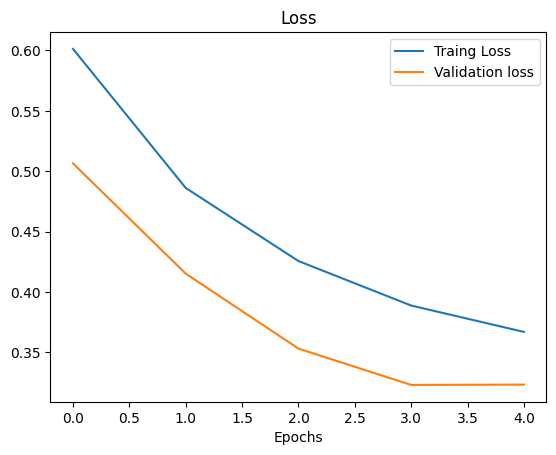

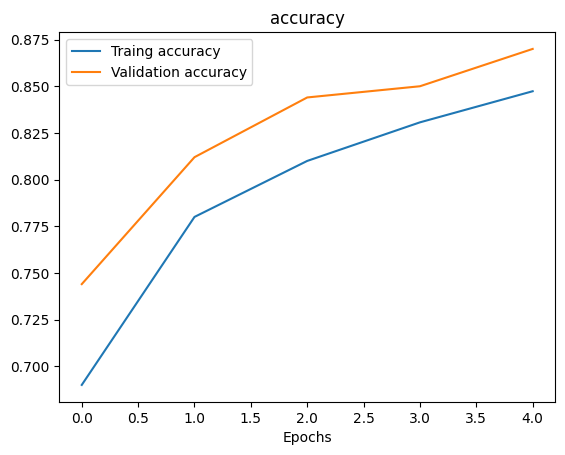

In [ ]:
plot_loss_curve(history_9)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **Transfer learning** to leverage what another image model has learn and adjust  if for our own use case

> **Practice:** Recreate the model on the CNN explainer websire (same as `model_1`) and see how it performs on the augmented shuffled training data.

In [ ]:
## Making a prediction with our trained model on our own custom data
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-12-02 14:50:38--  https://s-media-cache-ak0.pinimg.com/736x/84/8c/24/848c2464bda6280ef356b43454f6529d.jpg
Resolving s-media-cache-ak0.pinimg.com (s-media-cache-ak0.pinimg.com)... 151.101.20.84, 2a04:4e42:5::84
Connecting to s-media-cache-ak0.pinimg.com (s-media-cache-ak0.pinimg.com)|151.101.20.84|:443... connected.
HTTP request sent, awaiting response... 301 Found
Location: https://i.pinimg.com/736x/84/8c/24/848c2464bda6280ef356b43454f6529d.jpg [following]
--2023-12-02 14:50:38--  https://i.pinimg.com/736x/84/8c/24/848c2464bda6280ef356b43454f6529d.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.20.84, 2a04:4e42:5::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.20.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79529 (78K) [image/jpeg]
Saving to: ‘848c2464bda6280ef356b43454f6529d.jpg.1’

848c2464bda6280ef35 100%[===================>]  77.67K  --.-KB/s    in 0.01s   

2023-12-02 14:50:38 (5.72 MB/s) - ‘848c2464bda6280ef356b43454f6529d.jpg.1’

(-0.5, 735.5, 489.5, -0.5)

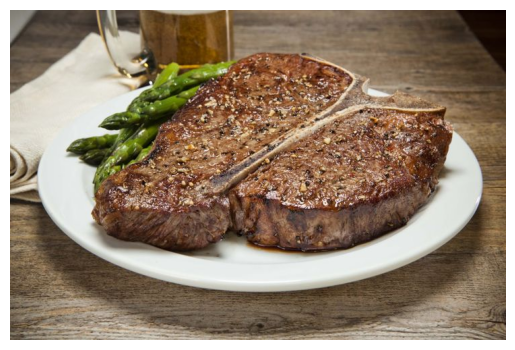

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget "https://s-media-cache-ak0.pinimg.com/736x/84/8c/24/848c2464bda6280ef356b43454f6529d.jpg"
steak = mpimg.imread("848c2464bda6280ef356b43454f6529d.jpg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape

(490, 736, 3)

In [ ]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

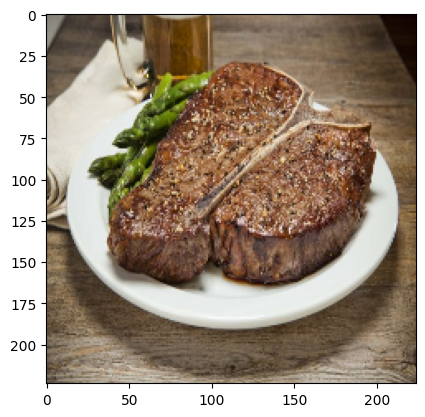

In [ ]:
steak_scaled_sized = resize_and_rescale(steak)
_ = plt.imshow(steak_scaled_sized)

In [ ]:
expaned_steak = tf.expand_dims(steak_scaled_sized, axis=0)
expaned_steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
# Create a helper function to preprocess our custom data
def load_prep_image(file_name, img_shape=224):
  """
  Reads an image from file_name, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels).
  """
  # Read the image
  img = tf.io.read_file(file_name)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/225.
  return img

In [ ]:
load_prep_image(steak)

ValueError: ignored

In [ ]:
expaned_steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.5019608 , 0.4901961 , 0.454902  ],
         [0.5058824 , 0.49411768, 0.45882356],
         [0.5086835 , 0.4969188 , 0.46162468],
         ...,
         [0.0509804 , 0.00392157, 0.00392157],
         [0.0509804 , 0.00392157, 0.00392157],
         [0.0509804 , 0.00392157, 0.00392157]],

        [[0.50632006, 0.49455535, 0.45926124],
         [0.50931376, 0.49754906, 0.46225494],
         [0.5134804 , 0.5017157 , 0.4664216 ],
         ...,
         [0.04705883, 0.        , 0.        ],
         [0.04705883, 0.        , 0.        ],
         [0.04705883, 0.        , 0.        ]],

        [[0.513603  , 0.50183827, 0.46654415],
         [0.5153537 , 0.503589  , 0.46829486],
         [0.52032566, 0.50856096, 0.47326684],
         ...,
         [0.05477941, 0.01164216, 0.00379902],
         [0.05477941, 0.01164216, 0.00379902],
         [0.05477941, 0.01164216, 0.00379902]],

        ...,

        [[0.34318978, 0.30789566, 

> **Note:** When you a train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocced into same format as the data your model was trained on.

In [ ]:
model_9.predict(expaned_steak)

1/1 [==============================] - 0s 181ms/step


array([[0.9907963]], dtype=float32)

In [ ]:
model_9.predict(tf.expand_dims(load_prep_image(steak), axis=0))

ValueError: ignored

In [ ]:
model_9.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 195ms/step


array([[0.8816619]], dtype=float32)

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget "https://content.fortune.com/wp-content/uploads/2023/01/221006_PIZZA_HUT_BIG_NEW_YORKER_PEDENMUNK_SHOT_2_BNY_GROUP_OUTDOOR_0279-e1673373494470.jpg?w=1440&q=75"


--2023-12-02 15:23:07--  https://content.fortune.com/wp-content/uploads/2023/01/221006_PIZZA_HUT_BIG_NEW_YORKER_PEDENMUNK_SHOT_2_BNY_GROUP_OUTDOOR_0279-e1673373494470.jpg?w=1440&q=75
Resolving content.fortune.com (content.fortune.com)... 192.0.66.84, 2a04:fa87:fffd::c000:4254
Connecting to content.fortune.com (content.fortune.com)|192.0.66.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298920 (292K) [image/jpeg]
Saving to: ‘221006_PIZZA_HUT_BIG_NEW_YORKER_PEDENMUNK_SHOT_2_BNY_GROUP_OUTDOOR_0279-e1673373494470.jpg?w=1440&q=75’

221006_PIZZA_HUT_BI 100%[===================>] 291.91K  --.-KB/s    in 0.1s    

2023-12-02 15:23:08 (2.78 MB/s) - ‘221006_PIZZA_HUT_BIG_NEW_YORKER_PEDENMUNK_SHOT_2_BNY_GROUP_OUTDOOR_0279-e1673373494470.jpg?w=1440&q=75’ saved [298920/298920]



(-0.5, 1439.5, 959.5, -0.5)

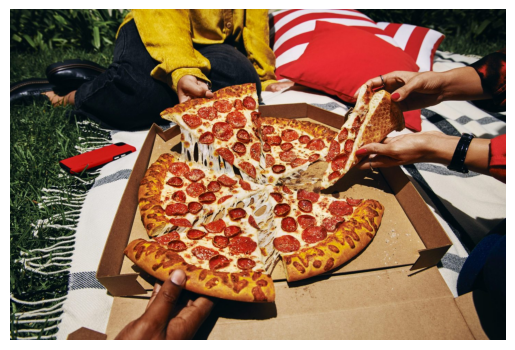

In [ ]:
pizza = mpimg.imread("/content/pizza_3.jpg")
plt.imshow(pizza)
plt.axis(False)

(-0.5, 223.5, 223.5, -0.5)

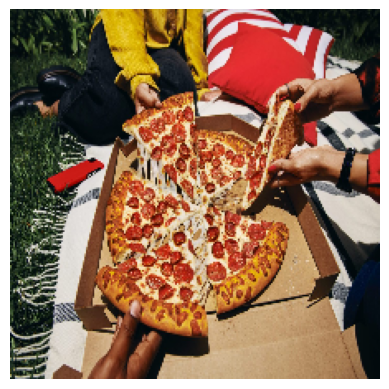

In [ ]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

pizza_scaled_sized = resize_and_rescale(pizza)
_ = plt.imshow(pizza_scaled_sized)
plt.axis(False)

In [ ]:
pizza_scaled_sized.shape

TensorShape([224, 224, 3])

In [ ]:
model_9.predict(tf.expand_dims(pizza_scaled_sized, axis=0))

1/1 [==============================] - 0s 19ms/step


array([[0.990858]], dtype=float32)